In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'tensorflow'

### Train the Autoencoder

In [2]:
def load_mnist_dataset(
                        random_state=42
                        ):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype(np.float32) / 255.0
    x_test = x_test.astype(np.float32) / 255.0

    x_train, y_train = shuffle(x_train, y_train, random_state=random_state)
    x_test, y_test = shuffle(x_test, y_test, random_state=random_state)
    
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    return (x_train, y_train), (x_test, y_test)

In [3]:
def build_auto_encoder_model():
    ae_model = tf.keras.models.Sequential([
                                        tf.keras.layers.Input(shape=(28, 28, 1)),
                                        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.UpSampling2D((2, 2)),
                                        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.UpSampling2D((2, 2)),
                                        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
                                        tf.keras.layers.UpSampling2D((2, 2)),
                                        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
                                        tf.keras.layers.UpSampling2D((2, 2)),
                                        tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
                                        ])
    ae_model.compile(
                    optimizer='adam', 
                    loss=tf.keras.losses.BinaryCrossentropy(name='bce'),
                    metrics=[
                            'mse',
                            'mae'
                            ]
                    )        
    return ae_model

def train_auto_encoder_model(ae_model_path = 'models/C04/ae.h5'):
    if not os.path.exists(ae_model_path):
        (x_train, _), (x_test, _) = load_mnist_dataset()
        ae_model = build_auto_encoder_model()
        history = ae_model.fit(
                                x_train, 
                                x_train, 
                                epochs=50, 
                                shuffle=True, 
                                batch_size=128, 
                                validation_data=(x_test, x_test)
                                )
        ae_model.save(ae_model_path)

        history.history['loss'] = np.cumsum(history.history['loss']) / np.arange(1, len(history.history['loss']) + 1)
        history.history['val_loss'] = np.cumsum(history.history['val_loss']) / np.arange(1, len(history.history['val_loss']) + 1)

        history.history['mae'] = np.cumsum(history.history['mae']) / np.arange(1, len(history.history['mae']) + 1)
        history.history['val_mae'] = np.cumsum(history.history['val_mae']) / np.arange(1, len(history.history['val_mae']) + 1)

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.plot(history.history['loss'], label='Train BCE')
        plt.plot(history.history['val_loss'], label='Validation BCE')
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(history.history['mse'], label='Train MSE')
        plt.plot(history.history['val_mse'], label='Validation MSE')
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.legend()
        
        plt.suptitle('Auto Encoder Model Training')
        plt.tight_layout()
        plt.show()

    else:
        ae_model = tf.keras.models.load_model(ae_model)
        ae_model.compile(
                        optimizer='adam', 
                        loss=tf.keras.losses.BinaryCrossentropy(name='bce'),
                        metrics=[
                                tf.keras.losses.MeanSquaredError(name='mse'),
                                tf.keras.metrics.MeanAbsoluteError(name='mae')
                                ]
                        )               
    return ae_model

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.3325 - mae: 0.1992 - mse: 0.0897 - val_loss: 0.1853 - val_mae: 0.0973 - val_mse: 0.0422
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1768 - mae: 0.0936 - mse: 0.0392 - val_loss: 0.1591 - val_mae: 0.0818 - val_mse: 0.0328
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1580 - mae: 0.0798 - mse: 0.0323 - val_loss: 0.1503 - val_mae: 0.0750 - val_mse: 0.0296
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1505 - mae: 0.0743 - mse: 0.0296 - val_loss: 0.1452 - val_mae: 0.0714 - val_mse: 0.0278
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1452 - mae: 0.0705 - mse: 0.0278 - val_loss: 0.1414 - val_mae: 0.0680 - val_mse: 0.0265
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1418 - mae: 0.0681 - mse: 0.0265 - val_loss: 0.1372 - val_mae: 0.0650 - val_mse: 0.0250
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1384 - mae: 0.0658 - mse: 0.025

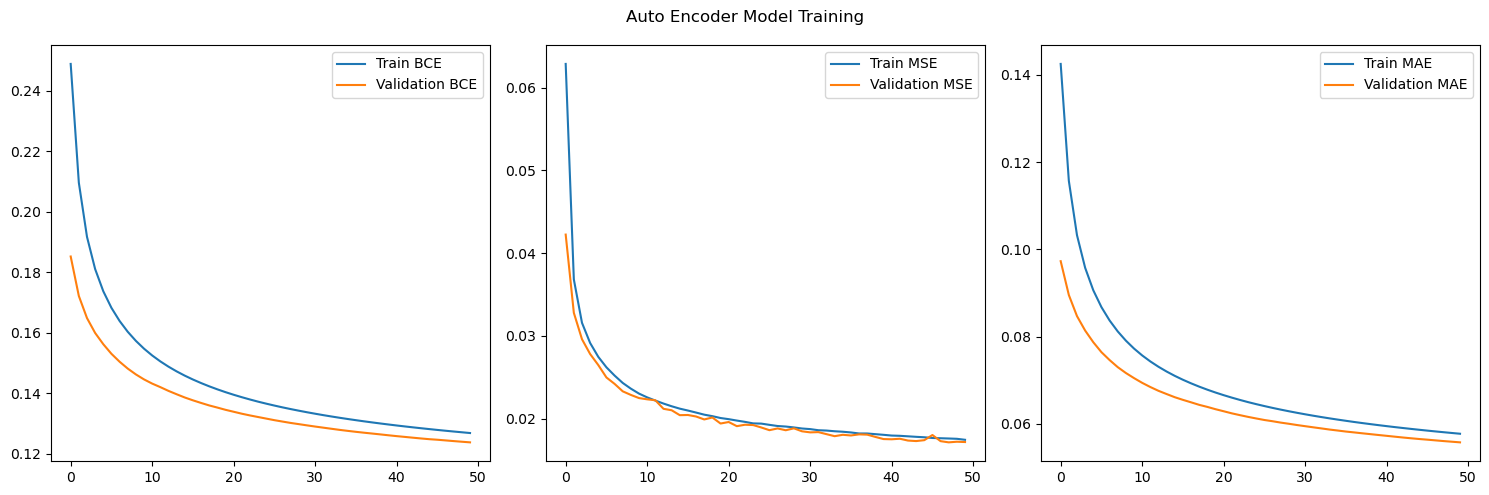

<Sequential name=sequential, built=True>

In [4]:
train_auto_encoder_model()

### Build Autoencoder Dataset

In [17]:
ae_model = tf.keras.models.load_model('models/C04/ae.h5')
ae_model.compile(
                optimizer='adam', 
                loss=tf.keras.losses.BinaryCrossentropy(name='bce'),
                metrics=[
                        tf.keras.losses.MeanSquaredError(name='mse'),
                        tf.keras.metrics.MeanAbsoluteError(name='mae')
                        ]
                )       

In [6]:
(x_train, y_train), (x_test, y_test) = load_mnist_dataset()
x_train_ae = ae_model.predict(x_train)
x_test_ae = ae_model.predict(x_test)

with open('files/C04/ae_data.npz', 'wb') as f:
    np.savez(
            f, 
            y_train=y_train, y_test=y_test, 
            x_train_ae=x_train_ae, x_test_ae=x_test_ae
            )

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
# apply sin function to the data
def sin_function(x):
    return np.sin(x)

x_train_ae = sin_function(x_train)
x_test_ae = sin_function(x_test)

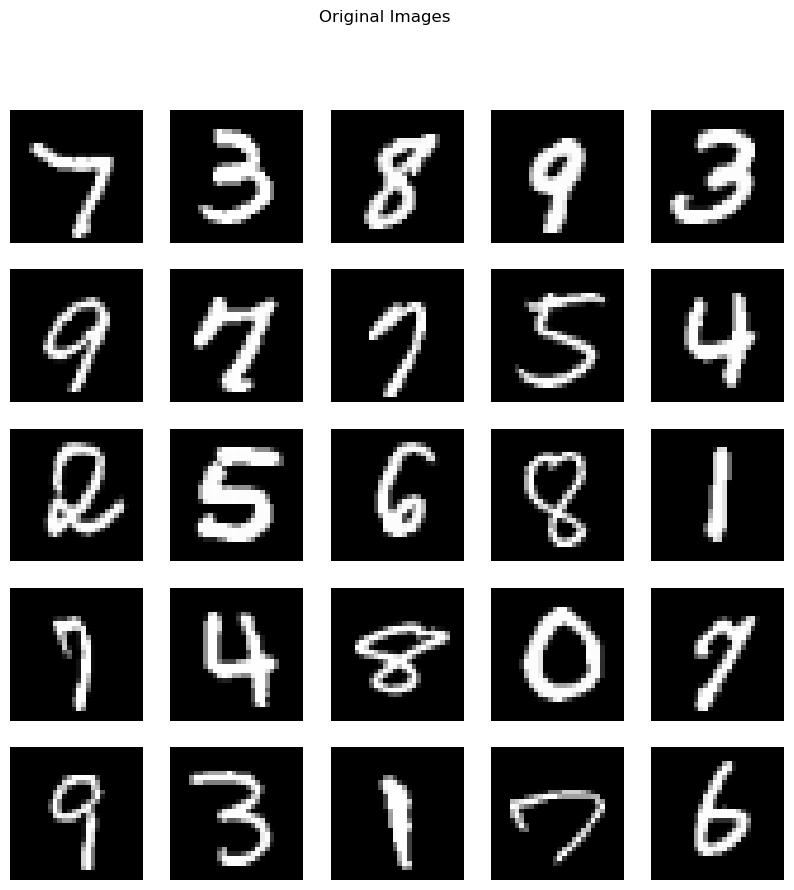

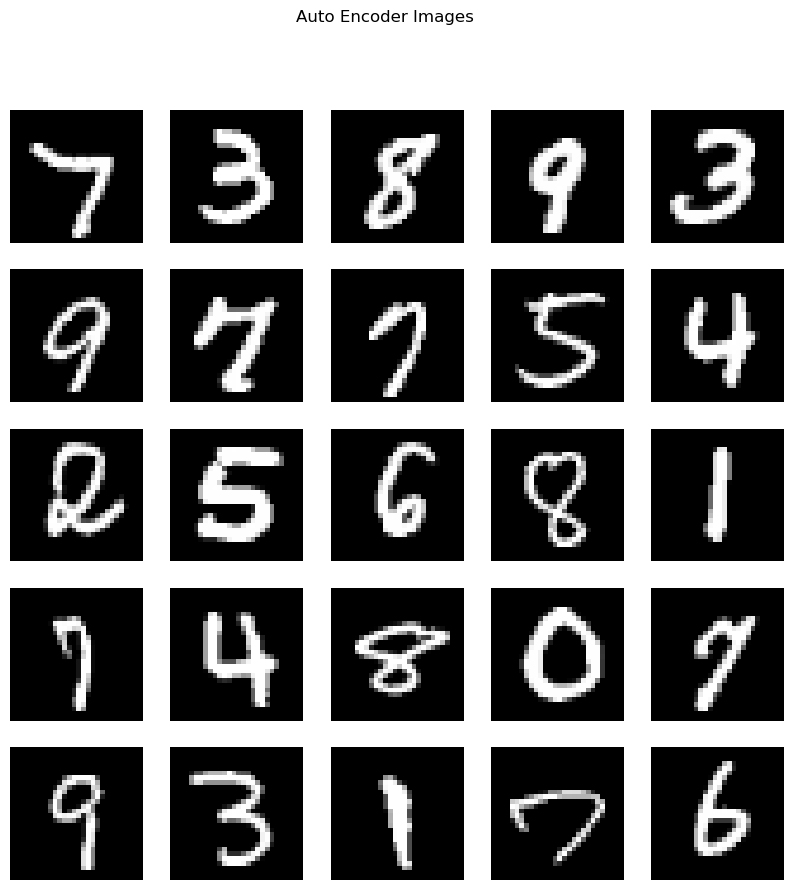

In [20]:
# Visualize 5 x 5 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Original Images')
plt.show()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_ae[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Auto Encoder Images')
plt.show()

### Noisy Dataset

In [8]:
def gaussian_noise(X, sigma=0.1):
    return X + np.random.normal(loc=0.0, scale=sigma, size=X.shape)

def laplacian_noise(X, sigma=0.1):
    return X + np.random.laplace(loc=0.0, scale=sigma, size=X.shape)

def salt_and_pepper_noise(X, p=0.1):
    X_noisy = X.copy()
    for i in range(X.shape[0]):
        mask = np.random.choice([0, 1], size=X.shape[1:], p=[1 - p, p])
        X_noisy[i] = X_noisy[i] * mask
    return X_noisy

In [9]:
(x_train, y_train), (x_test, y_test) = load_mnist_dataset()

x_train_gaussian = gaussian_noise(x_train)
x_test_gaussian = gaussian_noise(x_test)

x_train_laplacian = laplacian_noise(x_train)
x_test_laplacian = laplacian_noise(x_test)

x_train_salt_and_pepper = salt_and_pepper_noise(x_train)
x_test_salt_and_pepper = salt_and_pepper_noise(x_test)

with open('files/C04/noise_data.npz', 'wb') as f:
    np.savez(
            f, 
            y_train=y_train, y_test=y_test, 
            x_train_gaussian=x_train_gaussian, x_test_gaussian=x_test_gaussian,
            x_train_laplacian=x_train_laplacian, x_test_laplacian=x_test_laplacian,
            x_train_salt_and_pepper=x_train_salt_and_pepper, x_test_salt_and_pepper=x_test_salt_and_pepper
            )

### Build the Model

In [4]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = load_mnist_dataset()

with open('files/C04/ae_data.npz', 'rb') as f:
    data = np.load(f)
    y_train_ae = data['y_train']
    y_test_ae = data['y_test']
    x_train_ae = data['x_train_ae']
    x_test_ae = data['x_test_ae']

with open('files/C04/noise_data.npz', 'rb') as f:
    data = np.load(f)
    y_train_noise = data['y_train']
    y_test_noise = data['y_test']
    x_train_gaussian = data['x_train_gaussian']
    x_test_gaussian = data['x_test_gaussian']
    x_train_laplacian = data['x_train_laplacian']
    x_test_laplacian = data['x_test_laplacian']
    x_train_salt_and_pepper = data['x_train_salt_and_pepper']
    x_test_salt_and_pepper = data['x_test_salt_and_pepper']

In [5]:
x_train_all = np.concatenate([x_train_orig, x_train_ae, x_train_gaussian, x_train_laplacian, x_train_salt_and_pepper], axis=0)
y_train_all = np.concatenate([y_train_orig, y_train_ae, y_train_noise, y_train_noise, y_train_noise], axis=0)

x_test_all = np.concatenate([x_test_orig, x_test_ae, x_test_gaussian, x_test_laplacian, x_test_salt_and_pepper], axis=0)
y_test_all = np.concatenate([y_test_orig, y_test_ae, y_test_noise, y_test_noise, y_test_noise], axis=0)

x_train_all, y_train_all = shuffle(x_train_all, y_train_all, random_state=42)
x_test_all, y_test_all = shuffle(x_test_all, y_test_all, random_state=42)

In [6]:
print("X Train All Shape: ", x_train_all.shape)
print("Y Train All Shape: ", y_train_all.shape)
print("X Test All Shape: ", x_test_all.shape)
print("Y Test All Shape: ", y_test_all.shape)

X Train All Shape:  (300000, 28, 28, 1)
Y Train All Shape:  (300000,)
X Test All Shape:  (50000, 28, 28, 1)
Y Test All Shape:  (50000,)


In [7]:
def build_mnist_classifier():
    model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])
    model.compile(
                optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=[
                        tf.keras.metrics.CategoricalAccuracy(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        tf.keras.metrics.AUC()
                        ]
                )
    return model

def train_mnist_classifier(
                            model, 
                            x_train, y_train, 
                            x_test, y_test,
                            model_path
                            ):
    early_stopping = tf.keras.callbacks.EarlyStopping(
                                                    monitor='val_loss', 
                                                    patience=20, 
                                                    restore_best_weights=True
                                                    )               
    history = model.fit(
                    x_train, 
                    tf.keras.utils.to_categorical(y_train), 
                    epochs=50, 
                    batch_size=1024,
                    validation_data=(
                                    x_test, 
                                    tf.keras.utils.to_categorical(y_test)
                                    ),
                    callbacks=[early_stopping],
                    verbose=1
                    )
    model.save(model_path)
    return history

def load_mnist_classifier(model_path):
    model = tf.keras.models.load_model(model_path)
    model.compile(
                    optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=[
                            tf.keras.metrics.CategoricalAccuracy(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()
                            ]
                    )
    return model

def train_pipeline(
                    model_path,
                    x_train_, y_train_,
                    x_test_, y_test_
                    ):
    model = build_mnist_classifier()
    history = train_mnist_classifier(model, x_train_, y_train_, x_test_, y_test_, model_path)
    return history

c:\Users\isuru\anaconda3\envs\uni\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - auc: 0.9510 - categorical_accuracy: 0.7437 - loss: 0.8406 - precision: 0.8752 - recall: 0.6002 - val_auc: 0.9941 - val_categorical_accuracy: 0.9046 - val_loss: 0.2874 - val_precision: 0.9412 - val_recall: 0.8759
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - auc: 0.9948 - categorical_accuracy: 0.9102 - loss: 0.2710 - precision: 0.9423 - recall: 0.8848 - val_auc: 0.9953 - val_categorical_accuracy: 0.9168 - val_loss: 0.2501 - val_precision: 0.9439 - val_recall: 0.8951
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - auc: 0.9960 - categorical_accuracy: 0.9217 - loss: 0.2324 - precision: 0.9472 - recall: 0.9020 - val_auc: 0.9957 - val_categorical_accuracy: 0.9249 - val_loss: 0.2253 - val_precision: 0.9470 - val_recall: 0.9087
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - auc: 0.9966 - categorical_accuracy: 0.9285 - loss: 0.2121 - precision: 0.9508 - recall: 0.9109 - val_auc: 0.9965 - val_categorical_accuracy:

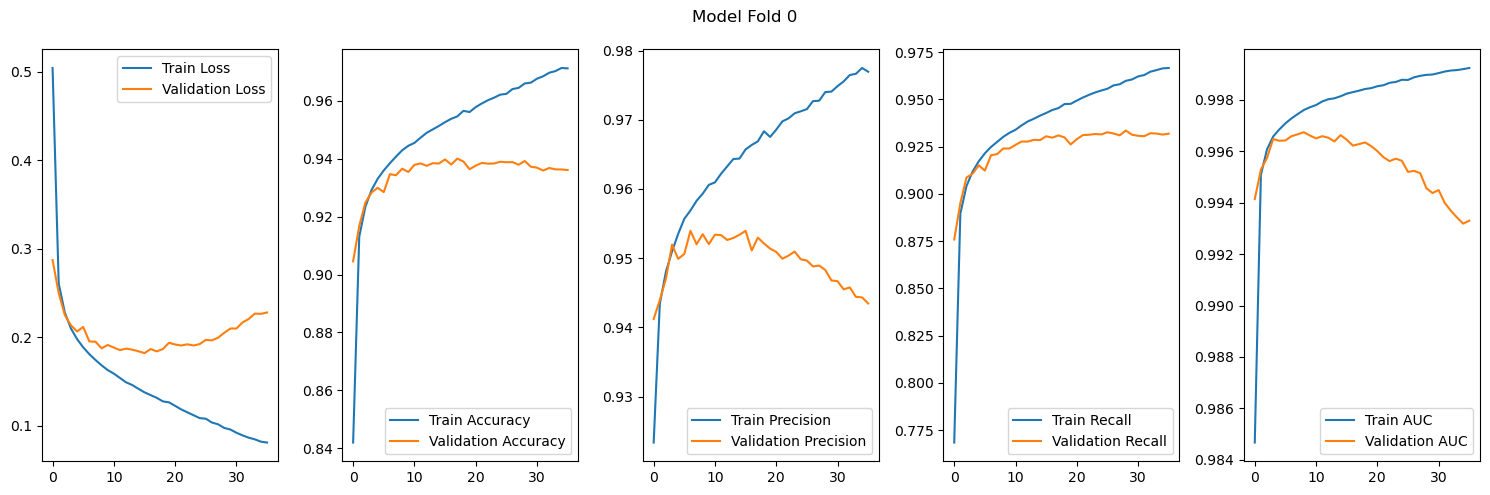

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 26s 89ms/step - auc_1: 0.9477 - categorical_accuracy: 0.7421 - loss: 0.8637 - precision_1: 0.8800 - recall_1: 0.5900 - val_auc_1: 0.9937 - val_categorical_accuracy: 0.9033 - val_loss: 0.2962 - val_precision_1: 0.9398 - val_recall_1: 0.8734
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - auc_1: 0.9946 - categorical_accuracy: 0.9087 - loss: 0.2773 - precision_1: 0.9423 - recall_1: 0.8812 - val_auc_1: 0.9956 - val_categorical_accuracy: 0.9198 - val_loss: 0.2414 - val_precision_1: 0.9474 - val_recall_1: 0.8974
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - auc_1: 0.9958 - categorical_accuracy: 0.9218 - loss: 0.2330 - precision_1: 0.9484 - recall_1: 0.9015 - val_auc_1: 0.9962 - val_categorical_accuracy: 0.9265 - val_loss: 0.2190 - val_precision_1: 0.9503 - val_recall_1: 0.9082
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - auc_1: 0.9964 - categorical_accuracy: 0.9291 - loss: 0.2123 - precision_1: 0.9516 - recall_1: 0.9106 - v

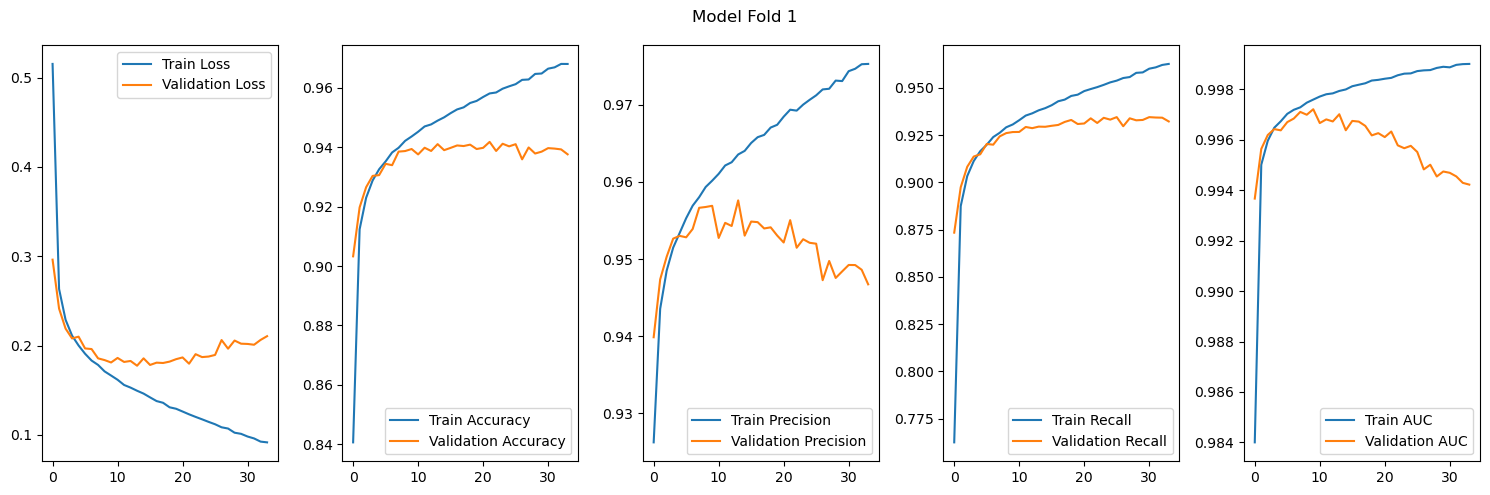

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - auc_2: 0.9492 - categorical_accuracy: 0.7355 - loss: 0.8507 - precision_2: 0.8782 - recall_2: 0.5948 - val_auc_2: 0.9938 - val_categorical_accuracy: 0.9032 - val_loss: 0.2928 - val_precision_2: 0.9384 - val_recall_2: 0.8733
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - auc_2: 0.9947 - categorical_accuracy: 0.9088 - loss: 0.2750 - precision_2: 0.9433 - recall_2: 0.8805 - val_auc_2: 0.9958 - val_categorical_accuracy: 0.9178 - val_loss: 0.2426 - val_precision_2: 0.9478 - val_recall_2: 0.8957
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - auc_2: 0.9958 - categorical_accuracy: 0.9201 - loss: 0.2373 - precision_2: 0.9478 - recall_2: 0.8992 - val_auc_2: 0.9963 - val_categorical_accuracy: 0.9257 - val_loss: 0.2213 - val_precision_2: 0.9514 - val_recall_2: 0.9071
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - auc_2: 0.9963 - categorical_accuracy: 0.9266 - loss: 0.2188 - precision_2: 0.9507 - recall_2: 0.9083 - v

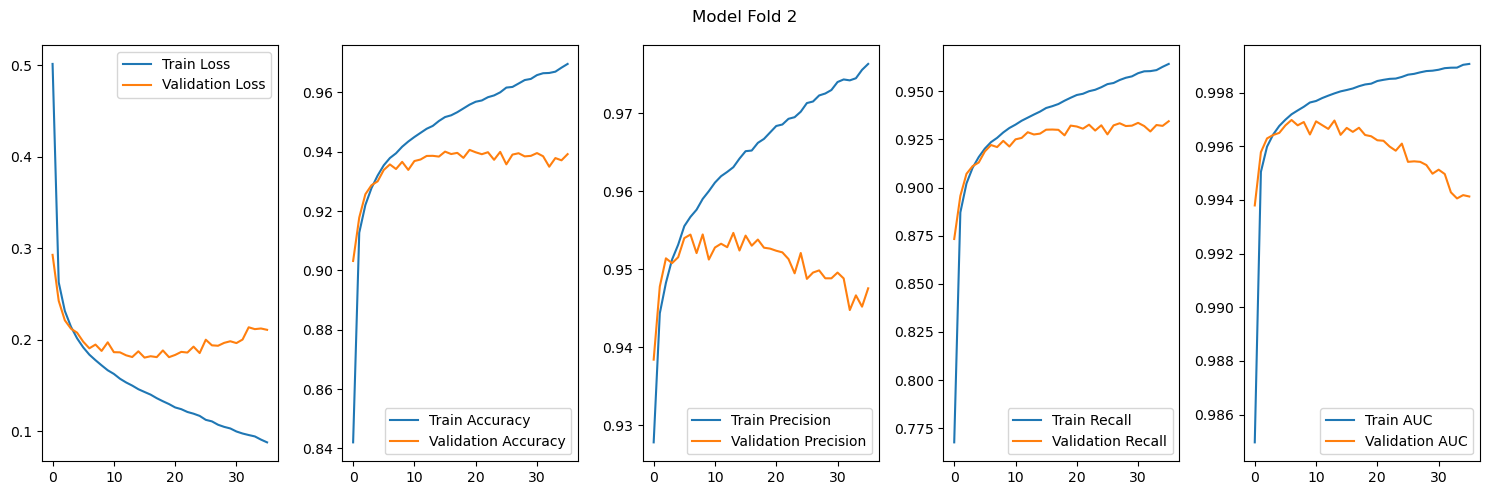

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - auc_3: 0.9474 - categorical_accuracy: 0.7414 - loss: 0.8772 - precision_3: 0.8716 - recall_3: 0.5847 - val_auc_3: 0.9943 - val_categorical_accuracy: 0.9040 - val_loss: 0.2922 - val_precision_3: 0.9433 - val_recall_3: 0.8704
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - auc_3: 0.9945 - categorical_accuracy: 0.9079 - loss: 0.2789 - precision_3: 0.9428 - recall_3: 0.8794 - val_auc_3: 0.9956 - val_categorical_accuracy: 0.9176 - val_loss: 0.2464 - val_precision_3: 0.9456 - val_recall_3: 0.8961
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - auc_3: 0.9959 - categorical_accuracy: 0.9218 - loss: 0.2338 - precision_3: 0.9479 - recall_3: 0.9020 - val_auc_3: 0.9962 - val_categorical_accuracy: 0.9246 - val_loss: 0.2246 - val_precision_3: 0.9503 - val_recall_3: 0.9054
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - auc_3: 0.9965 - categorical_accuracy: 0.9272 - loss: 0.2159 - precision_3: 0.9505 - recall_3: 0.9097 - v

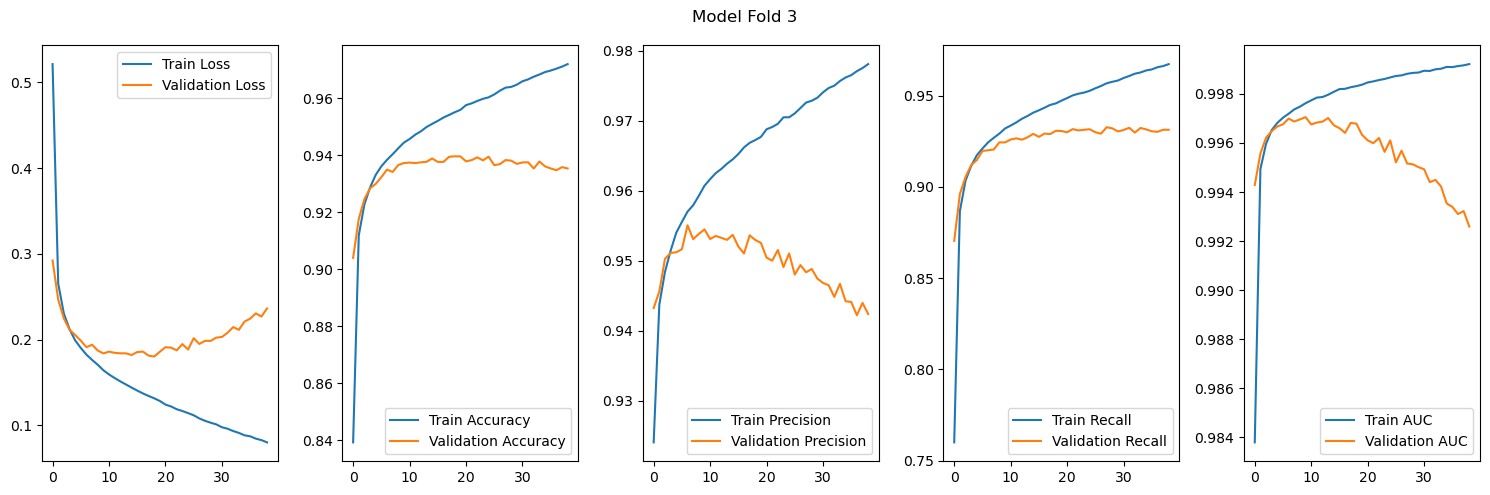

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - auc_4: 0.9488 - categorical_accuracy: 0.7301 - loss: 0.8514 - precision_4: 0.8784 - recall_4: 0.5976 - val_auc_4: 0.9938 - val_categorical_accuracy: 0.9015 - val_loss: 0.2949 - val_precision_4: 0.9383 - val_recall_4: 0.8728
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - auc_4: 0.9946 - categorical_accuracy: 0.9099 - loss: 0.2748 - precision_4: 0.9430 - recall_4: 0.8829 - val_auc_4: 0.9952 - val_categorical_accuracy: 0.9130 - val_loss: 0.2588 - val_precision_4: 0.9407 - val_recall_4: 0.8914
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - auc_4: 0.9958 - categorical_accuracy: 0.9202 - loss: 0.2388 - precision_4: 0.9472 - recall_4: 0.8989 - val_auc_4: 0.9957 - val_categorical_accuracy: 0.9221 - val_loss: 0.2309 - val_precision_4: 0.9452 - val_recall_4: 0.9051
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - auc_4: 0.9965 - categorical_accuracy: 0.9287 - loss: 0.2113 - precision_4: 0.9519 - recall_4: 0.9111 - v

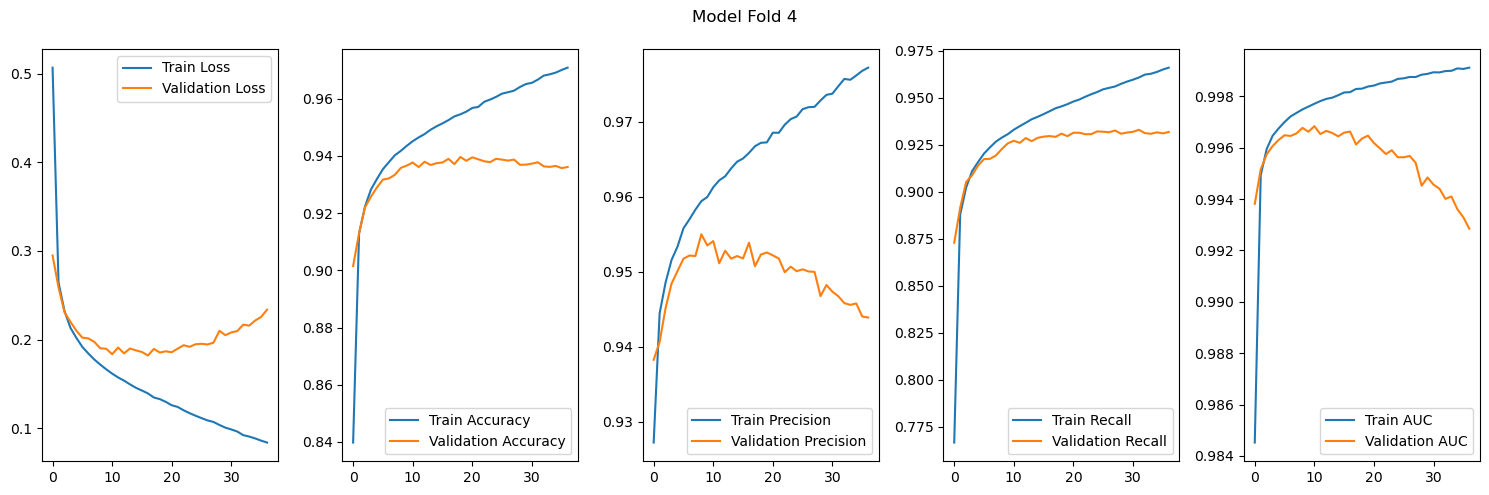

: 

In [8]:
x_all = np.concatenate([x_train_all, x_test_all], axis=0)
y_all = np.concatenate([y_train_all, y_test_all], axis=0)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(x_all)):
    x_train_fold = x_all[train_index]
    y_train_fold = y_all[train_index]
    x_test_fold = x_all[test_index]
    y_test_fold = y_all[test_index]

    model_path = 'models/C04/model_fold_{}.h5'.format(i)
    history = train_pipeline(model_path, x_train_fold, y_train_fold, x_test_fold, y_test_fold)

    plt.figure(figsize=(15, 5))

    if i == 0:
        plt.subplot(1, 5, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.legend()

        plt.subplot(1, 5, 2)
        plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
        plt.legend()

        plt.subplot(1, 5, 3)
        plt.plot(history.history['precision'], label='Train Precision')
        plt.plot(history.history['val_precision'], label='Validation Precision')
        plt.legend()

        plt.subplot(1, 5, 4)
        plt.plot(history.history['recall'], label='Train Recall')
        plt.plot(history.history['val_recall'], label='Validation Recall')
        plt.legend()

        plt.subplot(1, 5, 5)
        plt.plot(history.history['auc'], label='Train AUC')
        plt.plot(history.history['val_auc'], label='Validation AUC')
        plt.legend()

        plt.suptitle('Model Fold {}'.format(i))
        plt.tight_layout()
        plt.show()

    else:
        plt.subplot(1, 5, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.legend()

        plt.subplot(1, 5, 2)
        plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
        plt.legend()

        plt.subplot(1, 5, 3)
        plt.plot(history.history[f'precision_{i}'], label='Train Precision')
        plt.plot(history.history[f'val_precision_{i}'], label='Validation Precision')
        plt.legend()

        plt.subplot(1, 5, 4)
        plt.plot(history.history[f'recall_{i}'], label='Train Recall')
        plt.plot(history.history[f'val_recall_{i}'], label='Validation Recall')
        plt.legend()

        plt.subplot(1, 5, 5)
        plt.plot(history.history[f'auc_{i}'], label='Train AUC')
        plt.plot(history.history[f'val_auc_{i}'], label='Validation AUC')
        plt.legend()

        plt.suptitle('Model Fold {}'.format(i))
        plt.tight_layout()
        plt.show()

### Evaluation

In [9]:
model_path = 'models/C04/model_fold_{}.h5'

In [10]:
def load_mnist_classifier(model_path):
    model = tf.keras.models.load_model(model_path)
    model.compile(
                    optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=[
                            tf.keras.metrics.CategoricalAccuracy(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()
                            ]
                    )
    return model

model_dict = {}
for i in range(5):
    model_dict[i] = load_mnist_classifier(model_path.format(i))

In [31]:
cm_dict = {}

x_all = np.concatenate([x_train_all, x_test_all], axis=0)
y_all = np.concatenate([y_train_all, y_test_all], axis=0)
kf = KFold(n_splits=5, random_state=42, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(x_all)):
    x_train_fold = x_all[train_index]
    y_train_fold = y_all[train_index]
    x_test_fold = x_all[test_index]
    y_test_fold = y_all[test_index]

    model = model_dict[i]
    y_pred = model.predict(x_test_fold)
    y_pred = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test_fold, y_pred)
    cm_dict[i] = cm

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


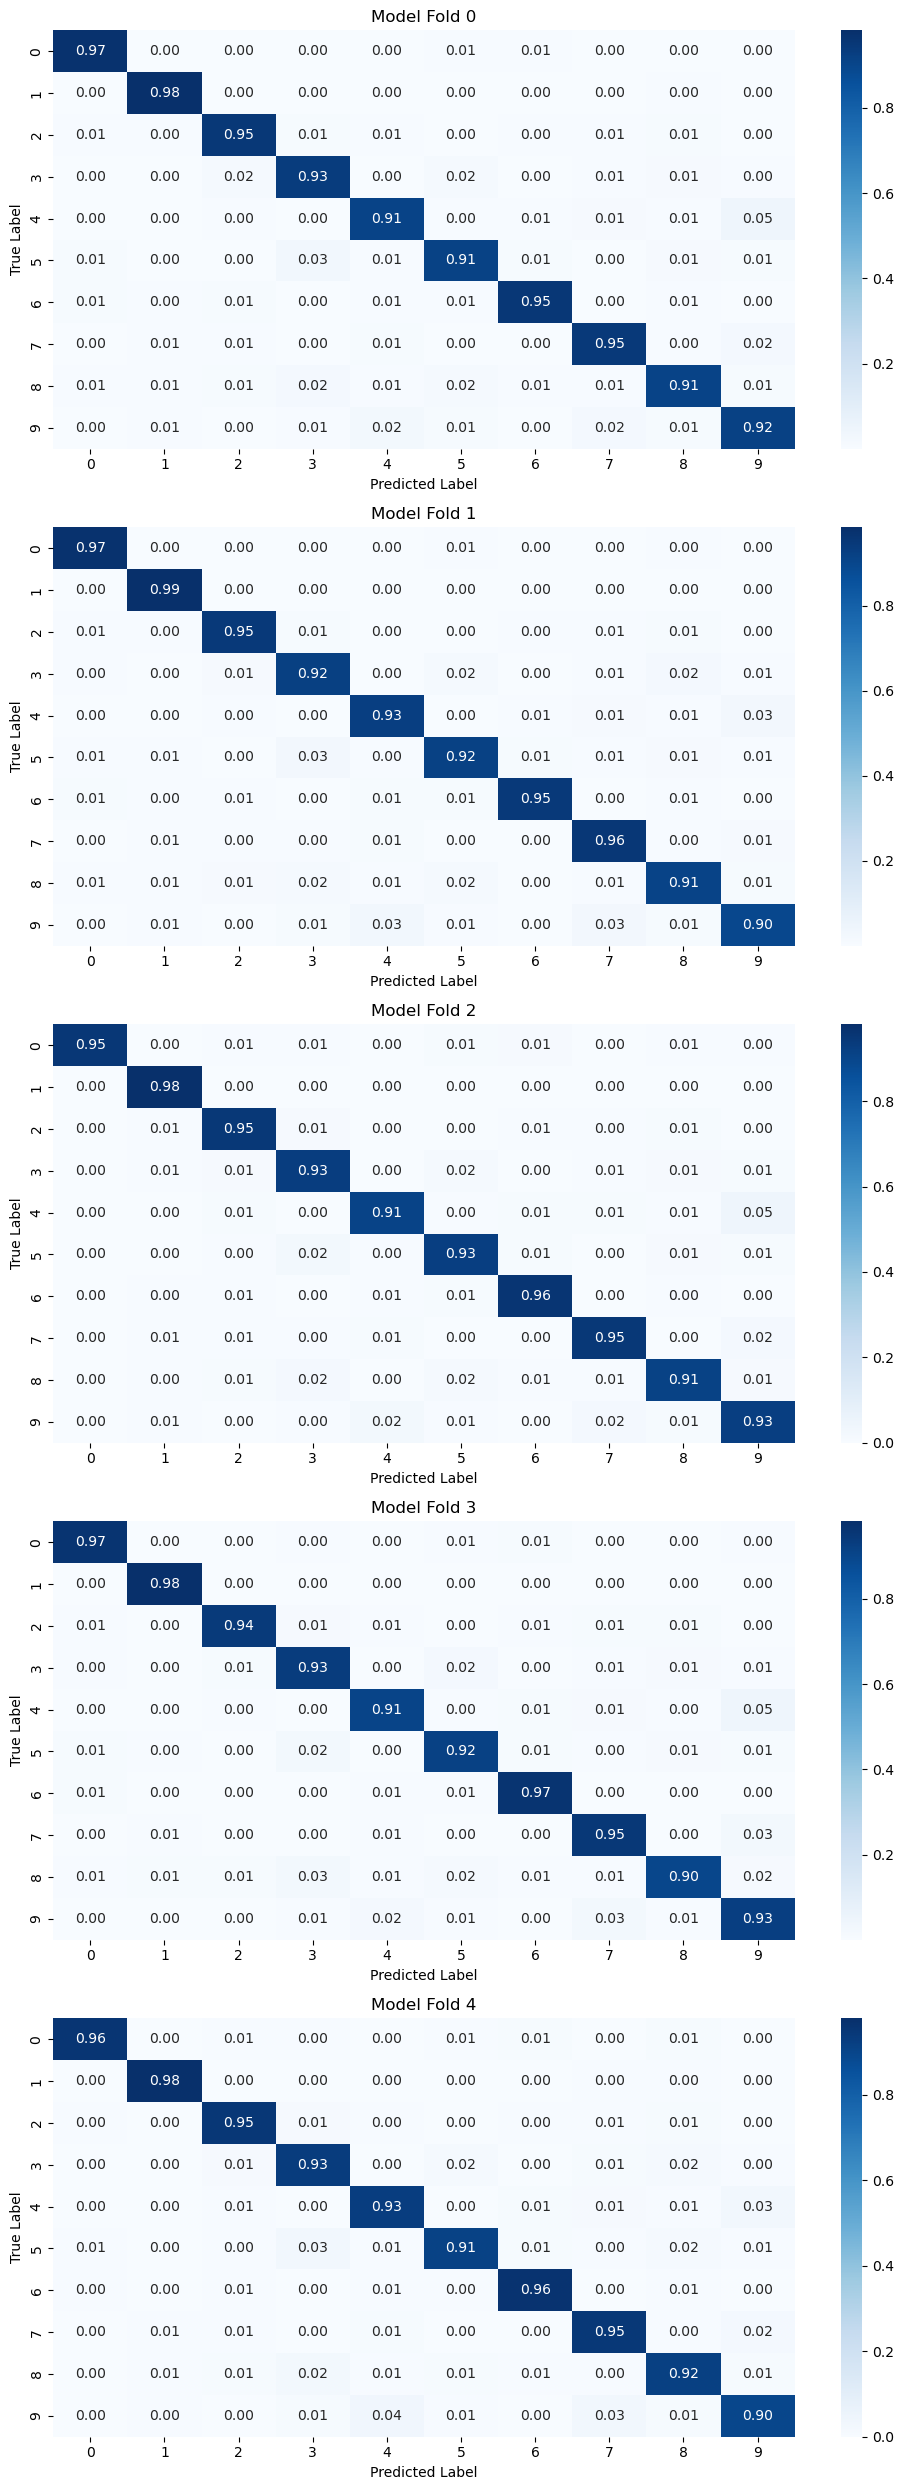

In [41]:
plt.figure(figsize=(10, 25))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    cm_dict[i] = cm_dict[i].astype('float') / cm_dict[i].sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_dict[i], annot=True, fmt='.2f', cmap='Blues', cbar=True, xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Model Fold {}'.format(i))    

plt.tight_layout()
plt.show()

### Performance Proof

In [20]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = load_mnist_dataset()

In [29]:
model_orig = build_mnist_classifier()
history_orig = train_mnist_classifier(model_orig, x_train_orig, y_train_orig, x_test_orig, y_test_orig, 'models/C04/base_model.h5')

Epoch 1/50


c:\Users\isuru\anaconda3\envs\uni\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - auc_7: 0.8742 - categorical_accuracy: 0.5825 - loss: 1.4434 - precision_7: 0.7567 - recall_7: 0.3027 - val_auc_7: 0.9955 - val_categorical_accuracy: 0.9332 - val_loss: 0.2304 - val_precision_7: 0.9478 - val_recall_7: 0.9166
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - auc_7: 0.9958 - categorical_accuracy: 0.9376 - loss: 0.2105 - precision_7: 0.9534 - recall_7: 0.9238 - val_auc_7: 0.9990 - val_categorical_accuracy: 0.9669 - val_loss: 0.1038 - val_precision_7: 0.9749 - val_recall_7: 0.9620
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - auc_7: 0.9983 - categorical_accuracy: 0.9652 - loss: 0.1134 - precision_7: 0.9725 - recall_7: 0.9604 - val_auc_7: 0.9988 - val_categorical_accuracy: 0.9756 - val_loss: 0.0807 - val_precision_7: 0.9794 - val_recall_7: 0.9725
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - auc_7: 0.9990 - categorical_accuracy: 0.9755 - loss: 0.0804 - precision_7: 0.9794 - recall_7: 0.9716 - val_auc_7: 0.9996 - val_

In [42]:
p_all = model_orig.predict(x_all)
p_all = np.argmax(p_all, axis=1)

10938/10938 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step


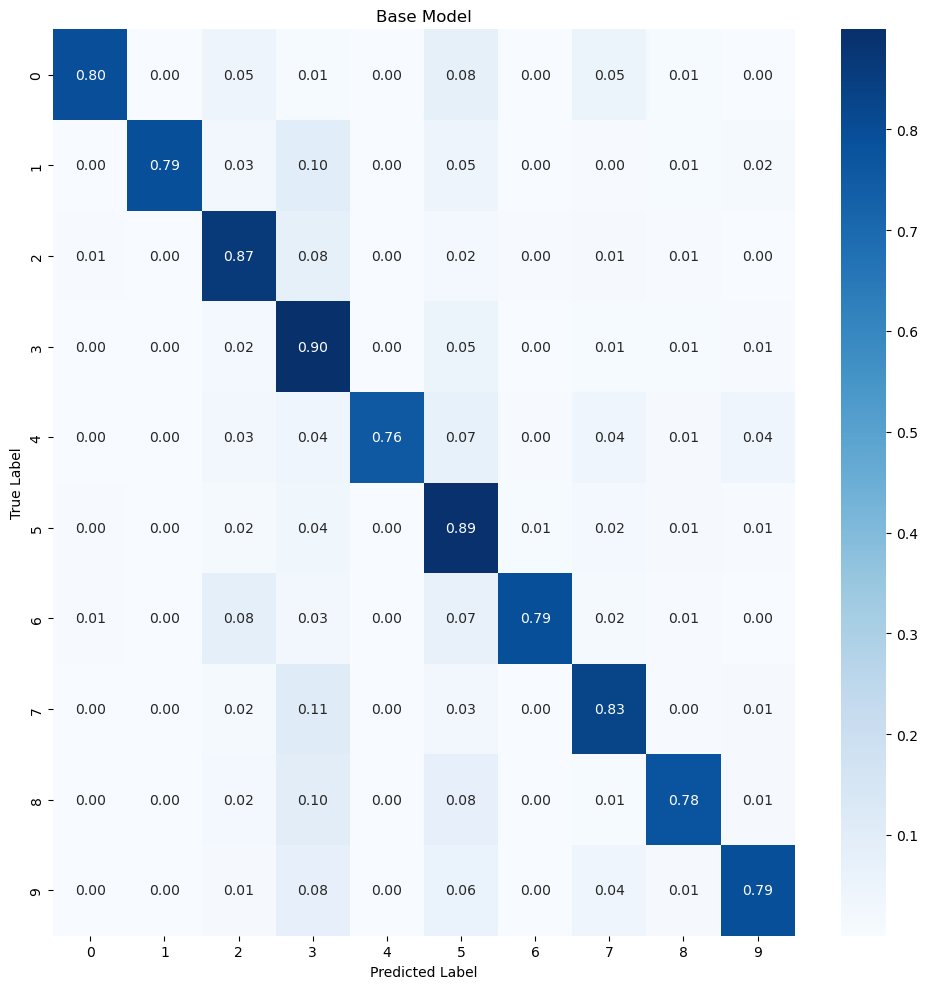

In [36]:
cm_all = confusion_matrix(y_all, p_all)
cm_all = cm_all.astype('float') / cm_all.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm_all, annot=True, fmt='.2f', cmap='Blues', cbar=True, xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Base Model')
plt.tight_layout()
plt.show()